## Usco Lightcurve Plot

In [1]:
#Get the imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
#The data

In [3]:
data = (

[59755.22,	2.6,	0.005,	0.036],
[59755.22,	3.4,	0.0002,	0.022],
[59755.22,	5.1,	0.013,	0.023],
[59755.22,	7.0,	0.061,	0.019],
[59755.22,	13.7,	0.211,	0.027],
[59755.22,	16.5,	0.216,	0.032],
[59755.22,	31.1,	0.424,	0.081],
[59755.22,	34.9,	0.452,	0.099],
[59769.25,	2.6,	0.019,	0.032],
[59769.25,	3.4,	0.013,	0.028],
[59769.25,	5.1,	0.065,	0.031],
[59769.25,	7.0,	0.115,	0.029],
[59769.25,	13.7,	0.125,	0.031],
[59769.25,	16.5,	0.169,	0.029],
[59769.25,	31.1,	0.010,	0.099],
[59769.25,	34.9,	0.193,	0.126],
[59776.14,	2.6,	0.002,	0.009],
[59776.14,	3.4,	0.010,	0.015],
[59776.14,	5.1,	0.017,	0.010],
[59776.14,	7.0,	0.057,	0.026],
[59776.14,	13.7,	0.105,	0.012],
[59776.14,	16.5,	0.108,	0.013],
[59776.14,	31.1,	0.185,	0.044],
[59776.14,	34.9,	0.152,	0.052],
[59796.03,	2.6,	-0.008,	0.038],
[59796.03,	3.4,	0.026,	0.025],
[59796.03,	5.1,	0.024,	0.022],
[59796.03,	7.0,	0.030,	0.020],
[59796.03,	13.7,	0.048,	0.025],
[59796.03,	16.5,	0.042,	0.029],
[59796.03,	31.1,	0.103,	0.072],
[59796.03,	34.9,	0.009,	0.083],
[59815.03,	2.6,	0.020,	0.057],
[59815.03,	3.4,	0.018,	0.027],
[59815.03,	5.1,	0.025,	0.024],
[59815.03,	7.0,	0.020,	0.023],
[59815.03,	13.7,	0.014,	0.022],
[59815.03,	16.5,	0.023,	0.027],
[59815.03,	31.1,	0.035,	0.065],
[59815.03,	34.9,	0.026,	0.070]

)

df =  pd.DataFrame(data, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

In [4]:
f2_6 = (
 [59755.22,	2.6,	0.005,	0.036],
    [59769.25,	2.6,	0.019,	0.032],
    [59776.14,	2.6,	0.002,	0.009],
    [59796.03,	2.6,	-0.008,	0.038],
    [59815.03,	2.6,	0.020,	0.057],
)

f3_4 = (
[59755.22,	3.4,	0.0002,	0.022],
    [59769.25,	3.4,	0.013,	0.028],
    [59776.14,	3.4,	0.010,	0.015],
    [59796.03,	3.4,	0.026,	0.025],
    [59815.03,	3.4,	0.018,	0.027],
)

f5_1 = (
[59755.22,	5.1,	0.013,	0.023],
    [59769.25,	5.1,	0.065,	0.031],
    [59776.14,	5.1,	0.017,	0.010],
    [59796.03,	5.1,	0.024,	0.022],
    [59815.03,	5.1,	0.025,	0.024],
)

f7 = (
[59755.22,	7.0,	0.061,	0.019],
    [59769.25,	7.0,	0.115,	0.029],
    [59776.14,	7.0,	0.057,	0.026],
    [59796.03,	7.0,	0.030,	0.020],
    [59815.03,	7.0,	0.020,	0.023],
)

f13_7 = (
[59755.22,	13.7,	0.211,	0.027],
    [59769.25,	13.7,	0.125,	0.031],
    [59776.14,	13.7,	0.105,	0.012],
    [59796.03,	13.7,	0.048,	0.025],
    [59815.03,	13.7,	0.014,	0.022],
)

f16_5 = (
[59755.22,	16.5,	0.216,	0.032],
    [59769.25,	16.5,	0.169,	0.029],
    [59776.14,	16.5,	0.108,	0.013],
    [59796.03,	16.5,	0.042,	0.029],
    [59815.03,	16.5,	0.023,	0.027],
)

f31_1 = (
[59755.22,	31.1,	0.424,	0.081],
    [59769.25,	31.1,	0.010,	0.099],
    [59776.14,	31.1,	0.185,	0.044],
    [59796.03,	31.1,	0.103,	0.072],
    [59815.03,	31.1,	0.035,	0.065],
)

f34_9 = (
[59755.22,	34.9,	0.452,	0.099],
    [59769.25,	34.9,	0.193,	0.126],
    [59776.14,	34.9,	0.152,	0.052],
    [59796.03,	34.9,	0.009,	0.083],
    [59815.03,	34.9,	0.026,	0.070]
)



In [5]:

df2_6 =  pd.DataFrame(f2_6, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df3_4 =  pd.DataFrame(f3_4, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df5_1 =  pd.DataFrame(f5_1, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df7 =  pd.DataFrame(f7, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df13_7 =  pd.DataFrame(f13_7, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df16_5 =  pd.DataFrame(f16_5, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df31_1 =  pd.DataFrame(f31_1, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df34_9 =  pd.DataFrame(f34_9, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

### Eruption on MJD 59736.72 (from Moriyama M., 2022, vsnet-alert 26798)

In [7]:
days2_6 = df2_6['MJD'] - 59736.72
flux2_6 = df2_6["Fluxdensity(mJy)"]
flux_err2_6 = np.sqrt(df2_6["error(mJy)"]**2 + (df2_6["Fluxdensity(mJy)"]*0.05)**2)

days3_4 = df3_4['MJD'] - 59736.72
flux3_4 = df3_4["Fluxdensity(mJy)"]
flux_err3_4 = np.sqrt(df3_4["error(mJy)"]**2 + (df3_4["Fluxdensity(mJy)"]*0.05)**2)

days5_1 = df5_1['MJD'] - 59736.72
flux5_1 = df5_1["Fluxdensity(mJy)"]
flux_err5_1 = np.sqrt(df5_1["error(mJy)"]**2 + (df5_1["Fluxdensity(mJy)"]*0.05)**2)

days7 = df7['MJD'] - 59736.72
flux7 = df7["Fluxdensity(mJy)"]
flux_err7 = np.sqrt(df7["error(mJy)"]**2 + (df7["Fluxdensity(mJy)"]*0.05)**2)

days13_7 = df13_7['MJD'] - 59736.72
flux13_7 = df13_7["Fluxdensity(mJy)"]
flux_err13_7 = np.sqrt(df13_7["error(mJy)"]**2 + (df13_7["Fluxdensity(mJy)"]*0.1)**2)

days16_5 = df16_5['MJD'] - 59736.72
flux16_5 = df16_5["Fluxdensity(mJy)"]
flux_err16_5 = np.sqrt(df16_5["error(mJy)"]**2 + (df16_5["Fluxdensity(mJy)"]*0.1)**2)

days31_1 = df31_1['MJD'] - 59736.72
flux31_1 = df31_1["Fluxdensity(mJy)"]
flux_err31_1 = np.sqrt(df31_1["error(mJy)"]**2 + (df31_1["Fluxdensity(mJy)"]*0.1)**2)

days34_9 = df34_9['MJD'] - 59736.72
flux34_9 = df34_9["Fluxdensity(mJy)"]
flux_err34_9 = np.sqrt(df34_9["error(mJy)"]**2 + (df34_9["Fluxdensity(mJy)"]*0.1)**2)

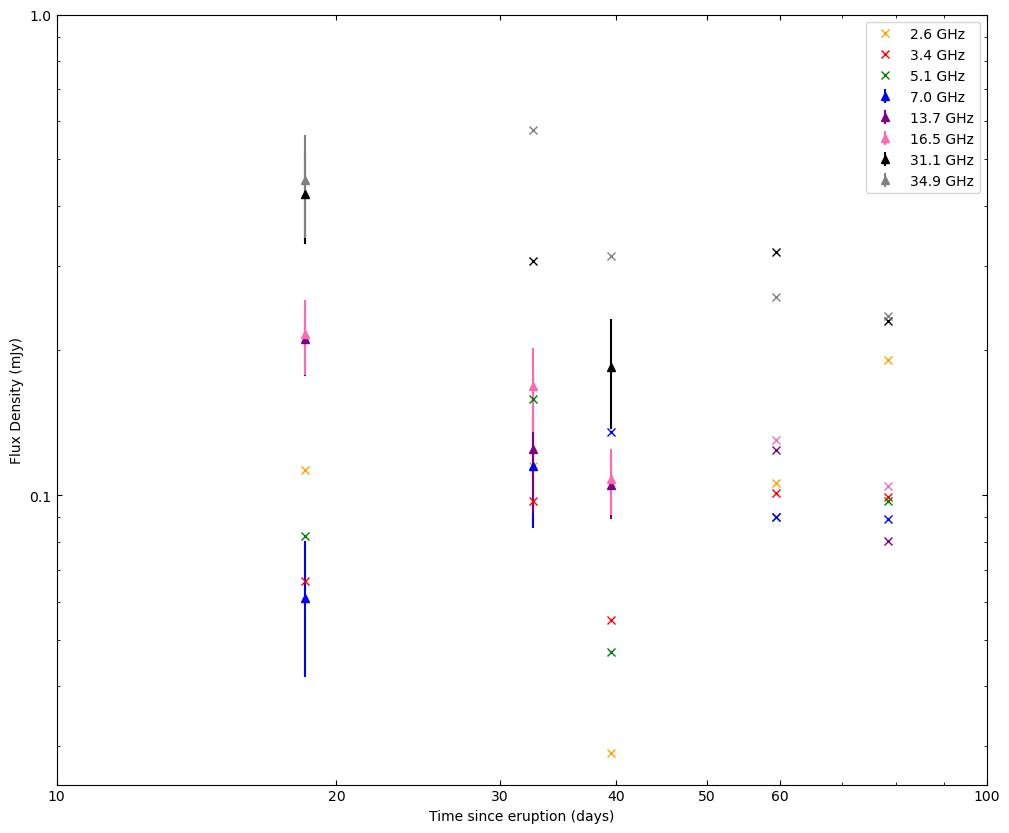

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

# Store which labels have already been used
used_labels = set()

def plot(days, fluxes, errors, color, label_name):
    for day, flux, err in zip(days, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label =label_name if label_name not in used_labels else None  # no label for non-detections

            ax.errorbar(day, (flux+3*err), fmt=fmt, color=color, label=label)
            
        if flux > 3*err :
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, flux, yerr=err, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)

# Plot each band
plot(days2_6, flux2_6, flux_err2_6, 'orange', '2.6 GHz')

plot(days3_4, flux3_4, flux_err3_4, 'red', '3.4 GHz')

plot(days5_1, flux5_1, flux_err5_1, 'green', '5.1 GHz')

plot(days7, flux7, flux_err7, 'blue', '7.0 GHz')

plot(days13_7, flux13_7, flux_err13_7, 'purple', '13.7 GHz')

plot(days16_5, flux16_5, flux_err16_5, 'hotpink', '16.5 GHz')

plot(days31_1, flux31_1, flux_err31_1, 'black', '31.1 GHz')

plot(days34_9, flux34_9, flux_err34_9, 'grey', '34.9 GHz')

# Final plot formatting
ax.set_xscale('log')
ax.set_xticks([10,20,30,40,50,60,100], labels = ['10','20', '30', '40','50', '60','100'])
ax.set_yscale('log')
ax.set_yticks([0.1,1], labels = ['0.1','1.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Flux Density (mJy)")

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend()
plt.show();